D:\ANCO\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


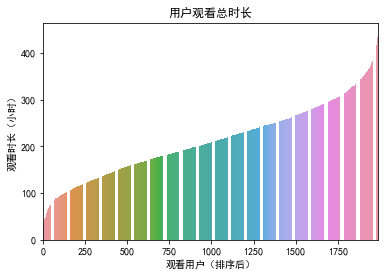

In [1]:
# 代码6-4
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示符号
media3 = pd.read_csv('file/media3.csv', header='infer')
# 用户观看总时长
m = pd.DataFrame(media3['wat_time'].groupby([media3['phone_no']]).sum())
m = m.sort_values(['wat_time'])
m = m.reset_index()
m['wat_time'] = m['wat_time'] / 3600
m['id'] = m.index
ax = sns.barplot(x='id', y='wat_time', data=m)
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('观看用户（排序后）')
plt.ylabel('观看时长（小时）')
plt.title('用户观看总时长')
plt.show()

D:\ANCO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANCO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


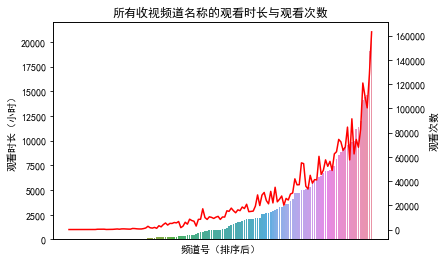

In [2]:
# 代码6-5
# 所有收视频道名称的观看时长与观看次数
media3.station_name.unique()
pindao = pd.DataFrame(media3['wat_time'].groupby([media3.station_name]).sum())
pindao = pindao.sort_values(['wat_time'])
pindao = pindao.reset_index()
pindao['wat_time'] = pindao['wat_time'] / 3600
pindao_n = media3['station_name'].value_counts()
pindao_n = pindao_n.reset_index()
pindao_n.columns = ['station_name', 'counts']
a = pd.merge(pindao, pindao_n, left_on='station_name', right_on ='station_name', how='left')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # 构建双轴
sns.barplot(a.index, a.iloc[:, 1], ax=ax1)
sns.lineplot(a.index, a.iloc[:, 2], ax=ax2, color='r')
ax1.set_ylabel('观看时长（小时）')
ax2.set_ylabel('观看次数')
ax1.set_xlabel('频道号（排序后）')
plt.xticks([])
plt.title('所有收视频道名称的观看时长与观看次数')
plt.show()

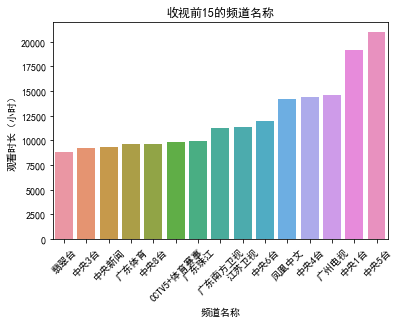

In [3]:
# 收视前15频道名称的观看时长，由于pindao已排序，取后15条数据
sns.barplot(x='station_name', y='wat_time', data=pindao.tail(15))
plt.xticks(rotation=45)
plt.xlabel('频道名称')
plt.ylabel('观看时长（小时）')
plt.title('收视前15的频道名称')
plt.show()


D:\ANCO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANCO\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


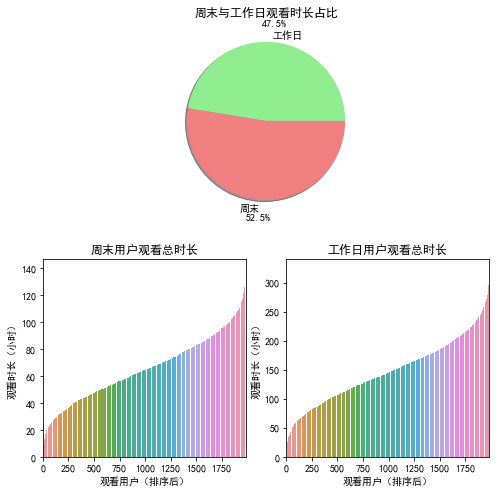

In [4]:
# 代码6-6
# 工作日与周末的观看时长比例
ind = [re.search('星期六|星期日', str(i)) != None for i in media3['星期']]
freeday = media3.loc[ind, :]
workday = media3.loc[[ind[i]==False for i in range(len(ind))], :]
m1 = pd.DataFrame(freeday['wat_time'].groupby([freeday['phone_no']]).sum())
m1 = m1.sort_values(['wat_time'])
m1 = m1.reset_index()
m1['wat_time'] = m1['wat_time'] / 3600
m2 = pd.DataFrame(workday['wat_time'].groupby([workday['phone_no']]).sum())
m2 = m2.sort_values(['wat_time'])
m2 = m2.reset_index()
m2['wat_time'] = m2['wat_time'] / 3600
w = sum(m2['wat_time']) / 5
f = sum(m1['wat_time']) / 2
plt.figure(figsize=(8, 8))
plt.subplot(211)  # 参数为：行，列，第几项  subplot(numRows, numCols, plotNum)
colors = 'lightgreen','lightcoral'
plt.pie([w, f], labels = ['工作日', '周末'], colors=colors, shadow=True,
        autopct='%1.1f%%', pctdistance=1.23)
plt.title('周末与工作日观看时长占比')
plt.subplot(223)
ax1 = sns.barplot(m1.index, m1.iloc[:, 1])
# 设置坐标刻度
ax1.xaxis.set_major_locator(ticker.MultipleLocator(250))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('观看用户（排序后）')
plt.ylabel('观看时长（小时）')
plt.title('周末用户观看总时长')
plt.subplot(224)
ax2 = sns.barplot(m2.index, m2.iloc[:, 1])
# 设置坐标刻度
ax2.xaxis.set_major_locator(ticker.MultipleLocator(250))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('观看用户（排序后）')
plt.ylabel('观看时长（小时）')
plt.title('工作日用户观看总时长')
plt.show()

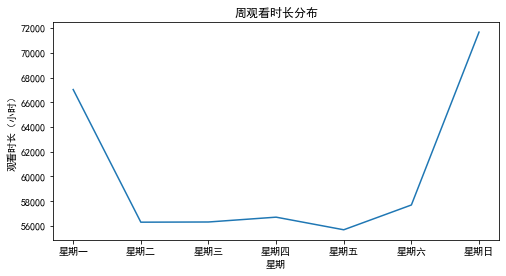

In [5]:
# 代码6-7
# 周观看时长分布
n = pd.DataFrame(media3['wat_time'].groupby([media3['星期']]).sum())
n = n.reset_index()
n = n.loc[[0, 2, 1, 5, 3, 4, 6], :]
n['wat_time'] = n['wat_time'] / 3600
plt.figure(figsize=(8, 4))
sns.lineplot(x='星期', y='wat_time', data=n)
plt.xlabel('星期')
plt.ylabel('观看时长（小时）')
plt.title('周观看时长分布')
plt.show()

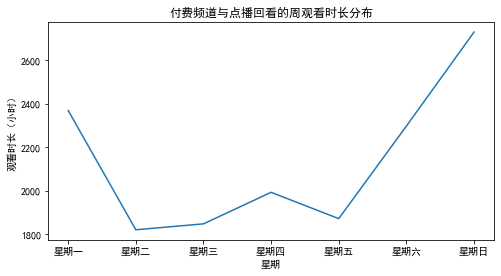

In [6]:
# 付费频道与点播回看的周观看时长分布
media_res = media3.loc[media3['res_type'] == 1, :]
ffpd_ind = [re.search('付费', str(i)) != None for i in media3.loc[:, 'station_name']]
media_ffpd = media3.loc[ffpd_ind, :]
z = pd.concat([media_res, media_ffpd], axis=0)
z = z['wat_time'].groupby(z['星期']).sum()
z = z.reset_index()
z = z.loc[[0, 2, 1, 5, 3, 4, 6], :]
z['wat_time'] = z['wat_time'] / 3600
plt.figure(figsize=(8, 4))
sns.lineplot(x='星期', y='wat_time', data=z)
plt.xlabel('星期')
plt.ylabel('观看时长（小时）')
plt.title('付费频道与点播回看的周观看时长分布')
plt.show()

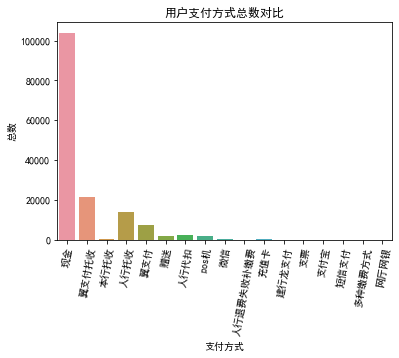

In [8]:
# 代码6-8
# 设置Matplotlib正常显示中文和负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 读取csv文件
pay = pd.read_csv('../tmp/payevents2.csv')
sns.countplot(x='payment_name', data=pay)
plt.xticks(rotation=80)
plt.xlabel('支付方式')
plt.ylabel('总数')
plt.title('用户支付方式总数对比')
plt.show()